1- Load the dataset and display the top 5 data.
2- Extract the independent and dependent variables.
3- Display the no of independent variable.
4- Fit the Linear regression model and daraw the scatter plot. Find the error
5- find the error 
6- Fit the polynomial model of different degree
7- Display the model using scatter plot & mean squared error
8- measure the R2 score and mean squared error of each of the model 
9:- predict the salary of a person with lv7 for different model.

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [159]:
dataframe=pd.read_csv("polynomial_regression.csv")
dataframe

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-Level,9,500000
9,CEO,10,1000000


In [160]:
dataframe.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [161]:

y=dataframe.iloc[:,2].values
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [162]:
dataframe.shape


(10, 3)

In [163]:
x=dataframe.iloc[:,1].values
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [164]:
# y.count()
# x.count() 

In [165]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.3,random_state=0)

In [166]:
from sklearn.linear_model import LinearRegression 
model=LinearRegression()
model

LinearRegression()

In [167]:
x=x.reshape(-1,1)
x
y=y.reshape(-1,1)
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

In [168]:
model.fit(x,y)

LinearRegression()

In [169]:
model.score(x,y)

0.6690412331929895

In [170]:
model.predict([[6]])

array([[289939.39393939]])

In [171]:
model.coef_

array([[80878.78787879]])

In [172]:
model.intercept_

array([-195333.33333333])

In [173]:
y_predict=model.predict(x)
y_predict

array([[-114454.54545455],
       [ -33575.75757576],
       [  47303.03030303],
       [ 128181.81818182],
       [ 209060.60606061],
       [ 289939.39393939],
       [ 370818.18181818],
       [ 451696.96969697],
       [ 532575.75757576],
       [ 613454.54545455]])

In [174]:
from sklearn.metrics import mean_squared_error
print('erro= ',mean_squared_error(y,y_predict))

erro=  26695878787.878788


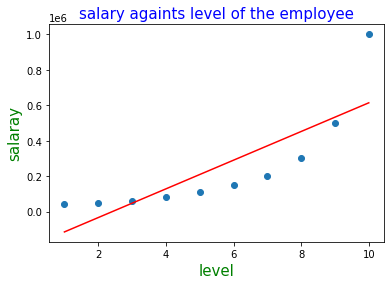

In [176]:
plt.scatter(x,y)
plt.plot(x,y_predict,color='red')
plt.xlabel('level',color='green',fontsize=15)
plt.ylabel('salaray',color='green',fontsize=15)
plt.title("salary againts level of the employee",color="blue",fontsize=15)
plt.show()

In [223]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=5)
x_poly=poly_reg.fit_transform(x)
model2=LinearRegression()
model2.fit(x_poly,y)

LinearRegression()

In [224]:
model2.score(x_poly,y)
plot_x=x_poly[:,2]
x_poly
plot_x

array([  1.,   4.,   9.,  16.,  25.,  36.,  49.,  64.,  81., 100.])

In [225]:
predict2=model2.predict(x_poly)
predict2

array([[ 43895.10489581],
       [ 53836.82983727],
       [ 57065.26806545],
       [ 77286.71328669],
       [112263.40326324],
       [152736.59673637],
       [201349.6503494 ],
       [291571.09557084],
       [506617.71561748],
       [998377.62237746]])

In [226]:
print("error of model2 of degree 2 =",mean_squared_error(predict2,y))

error of model2 of degree 2 = 16382284.38228389


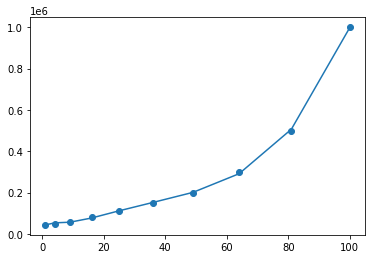

In [227]:
x_grid=np.arange(min(x),max(x),0.1)
x_grid=x_grid.reshape(len(x_grid),1)
# plt.scatter(x,y)
plt.scatter(plot_x,y)
plt.plot(plot_x,predict2)

In [228]:
model2.score(x_poly,y)

0.9997969027099755

In [229]:
model2.intercept_


array([-41333.33333246])

In [230]:
model2.coef_

array([[ 0.00000000e+00,  1.60731002e+05, -1.00378788e+05,
         2.81649184e+04, -3.44638695e+03,  1.57692308e+02]])